Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Sample Superstore dataset
superstore_df = pd.read_excel('Sample_Superstore.xlsx')

# Load Deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Preview the first few rows of both datasets
print(superstore_df.head())
print(deliveries_df.head())

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   20847           High      0.01        2.84           0.93            3   
1   20228  Not Specified      0.02      500.98          26.00            5   
2   21776       Critical      0.06        9.48           7.29           11   
3   24844         Medium      0.09       78.69          19.99           14   
4   24846         Medium      0.08        3.28           2.31           14   

       Customer Name       Ship Mode Customer Segment Product Category  ...  \
0      Bonnie Potter     Express Air        Corporate  Office Supplies  ...   
1     Ronnie Proctor  Delivery Truck      Home Office        Furniture  ...   
2      Marcus Dunlap     Regular Air      Home Office        Furniture  ...   
3  Gwendolyn F Tyson     Regular Air   Small Business        Furniture  ...   
4  Gwendolyn F Tyson     Regular Air   Small Business  Office Supplies  ...   

    Region State or Province         City  Postal Code O

Step 2: Data Preprocessing

In [2]:
# Handle missing values (drop or fill)
superstore_df.dropna(subset=['Sales', 'Profit', 'Shipping Cost'], inplace=True)

# Convert date columns to datetime format
superstore_df['Order Date'] = pd.to_datetime(superstore_df['Order Date'], errors='coerce')
superstore_df['Ship Date'] = pd.to_datetime(superstore_df['Ship Date'], errors='coerce')

# Convert start_date to datetime format in Deliveries dataset
deliveries_df['start_date'] = pd.to_datetime(deliveries_df['start_date'], errors='coerce')

# Verify data after cleaning
print(superstore_df[['Order Date', 'Ship Date']].head())
print(deliveries_df[['start_date']].head())


  Order Date  Ship Date
0 2015-01-07 2015-01-08
1 2015-06-13 2015-06-15
2 2015-02-15 2015-02-17
3 2015-05-12 2015-05-14
4 2015-05-12 2015-05-13
  start_date
0 2023-03-31
1 2023-03-31
2 2023-03-31
3 2023-03-31
4 2023-03-31


Step 3: Optimize Inventory Management

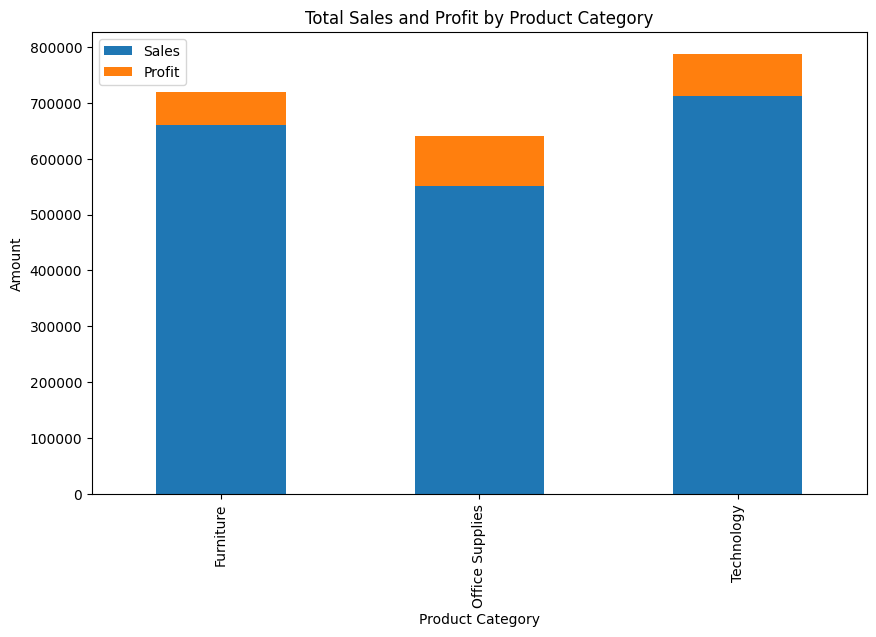

  Product Category          EOQ
0        Furniture  3635.118457
1  Office Supplies  3320.748771
2       Technology  3774.294504


In [11]:
# Group by Product Category to analyze sales and profit
category_sales_profit = superstore_df.groupby('Product Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Visualize sales and profit by product category
category_sales_profit.plot(kind='bar', x='Product Category', y=['Sales', 'Profit'], stacked=True, figsize=(10, 6))
plt.title('Total Sales and Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.show()

# Assuming ordering cost and holding cost are constants for now
ordering_cost = 50  # Assumed cost per order
holding_cost = 5   # Assumed cost per unit per year

# Calculate EOQ for each product category
category_sales_profit['EOQ'] = np.sqrt((2 * category_sales_profit['Sales'] * ordering_cost) / holding_cost)

# Display the EOQ for each category
print(category_sales_profit[['Product Category', 'EOQ']])


Step 4: Reduce Costs

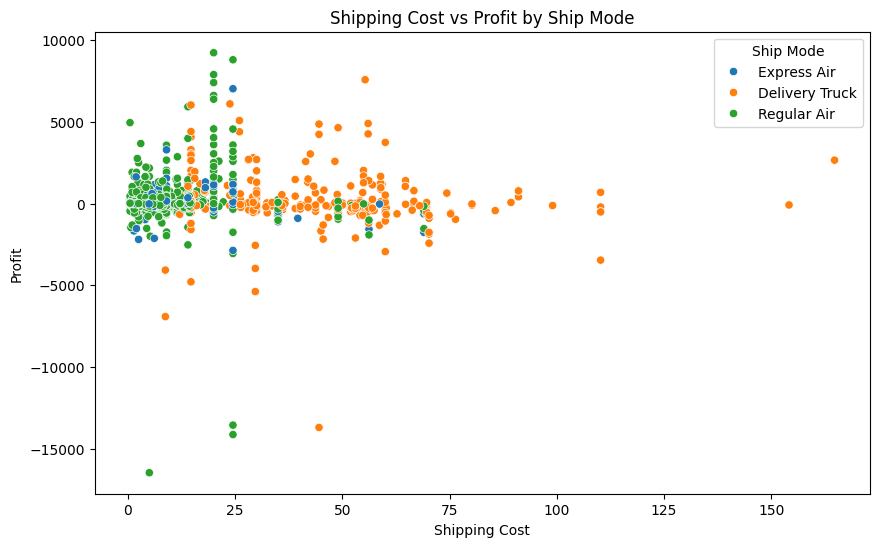

               Shipping Cost    Profit
Shipping Cost       1.000000  0.002177
Profit              0.002177  1.000000


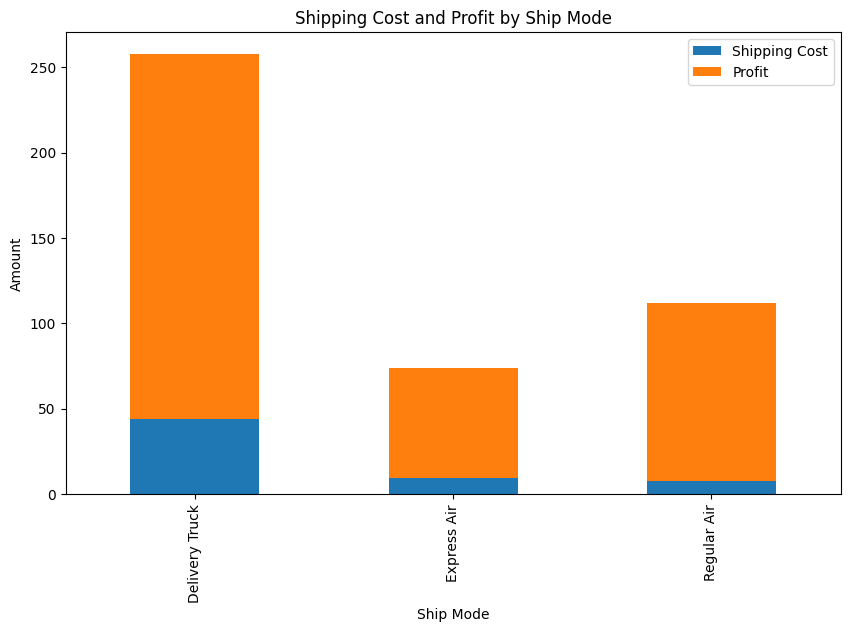

In [14]:
# Shipping cost vs profit scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_df, x='Shipping Cost', y='Profit', hue='Ship Mode')
plt.title('Shipping Cost vs Profit by Ship Mode')
plt.show()

# Correlation between Shipping Cost and Profit
print(superstore_df[['Shipping Cost', 'Profit']].corr())

# Group by Ship Mode and summarize costs and profits
ship_mode_analysis = superstore_df.groupby('Ship Mode').agg({'Shipping Cost': 'mean', 'Profit': 'mean'}).reset_index()

# Plot Ship Mode vs Shipping Cost and Profit
ship_mode_analysis.plot(kind='bar', x='Ship Mode', y=['Shipping Cost', 'Profit'], stacked=True, figsize=(10, 6))
plt.title('Shipping Cost and Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Amount')
plt.show()

Step 5: Improve Delivery Times

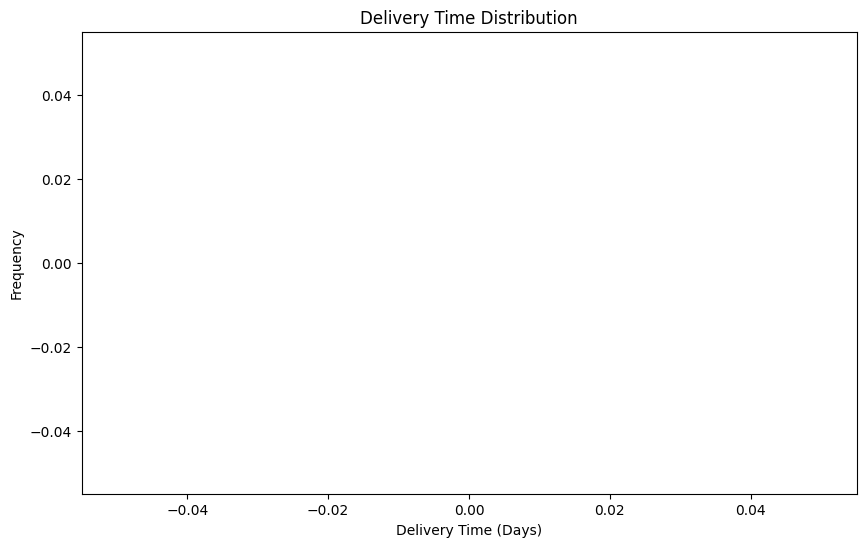

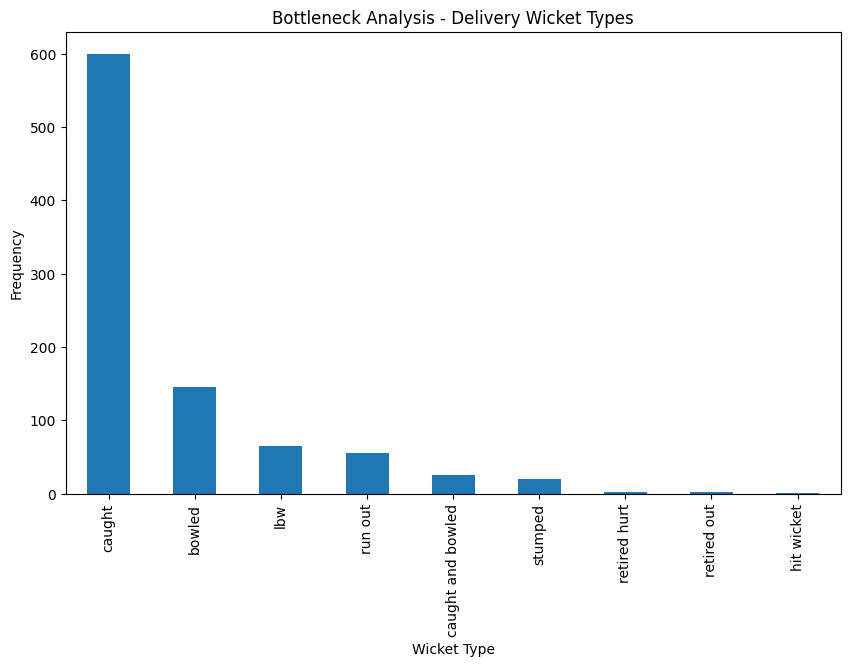

In [16]:
# Merge data to compute delivery times (if applicable)
# We'll merge using `Order Date` and `start_date` or any common column
merged_df = pd.merge(superstore_df, deliveries_df, left_on='Order Date', right_on='start_date', how='inner')

# Calculate delivery time (in days)
merged_df['Delivery Time'] = (merged_df['Ship Date'] - merged_df['start_date']).dt.days

# Plot Delivery Time distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Delivery Time'], kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Analyze bottlenecks in delivery based on wicket_type (if relevant)
bottleneck_analysis = deliveries_df['wicket_type'].value_counts()

# Plot bottleneck types
bottleneck_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Bottleneck Analysis - Delivery Wicket Types')
plt.xlabel('Wicket Type')
plt.ylabel('Frequency')
plt.show()

Step 6: Identify Bottlenecks or Inefficiencies

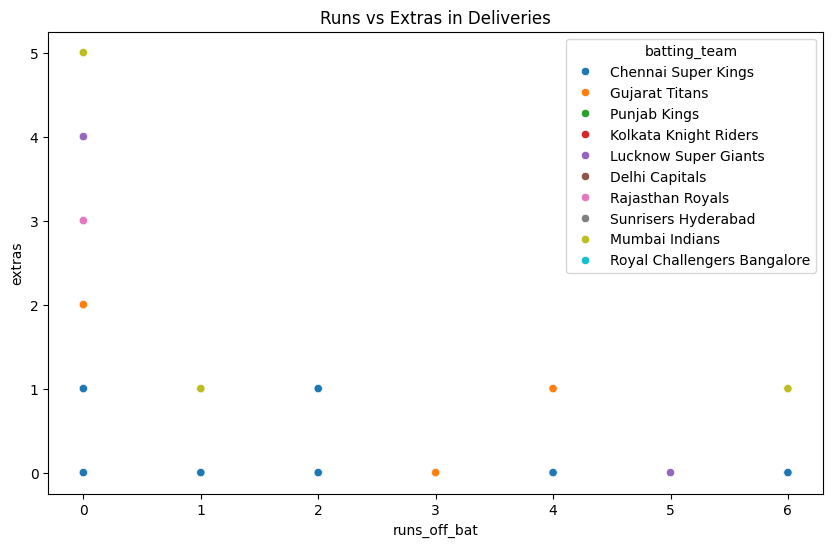

In [17]:
# Analyze the relationship between runs, extras, and deliveries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deliveries_df, x='runs_off_bat', y='extras', hue='batting_team')
plt.title('Runs vs Extras in Deliveries')
plt.show()

In [18]:
# Install Plotly if not already installed
!pip install plotly

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


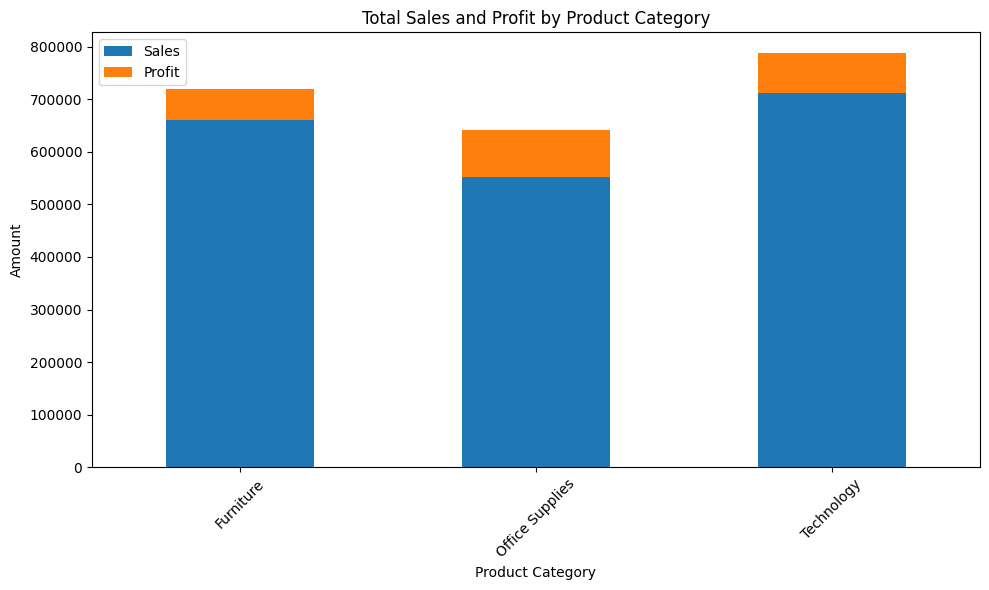

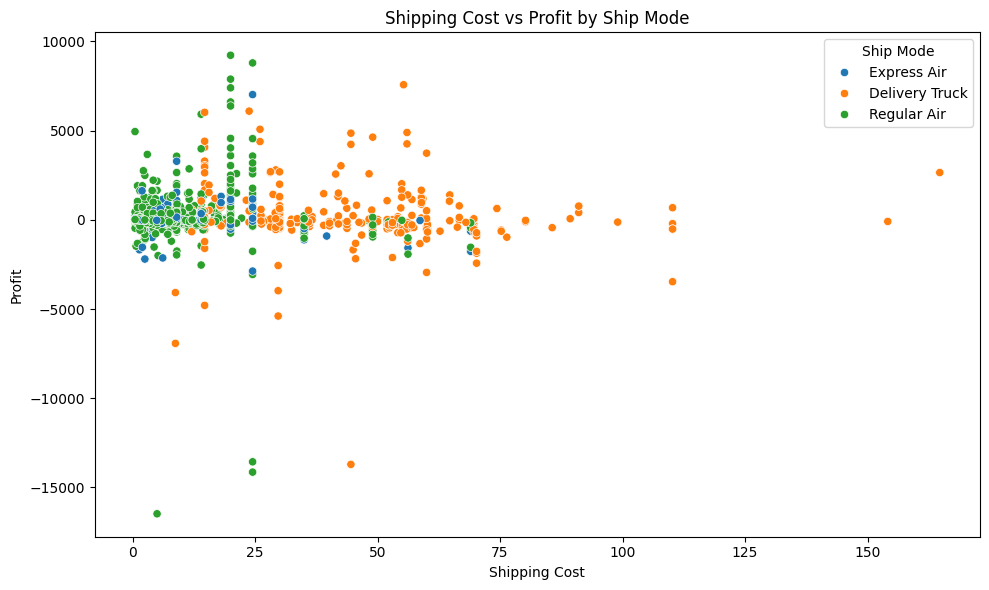

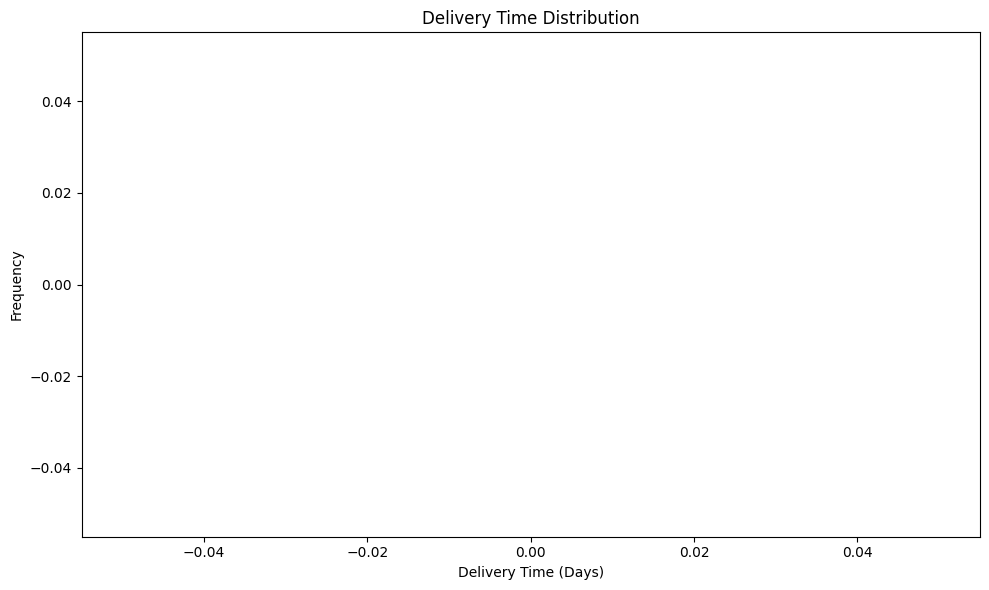

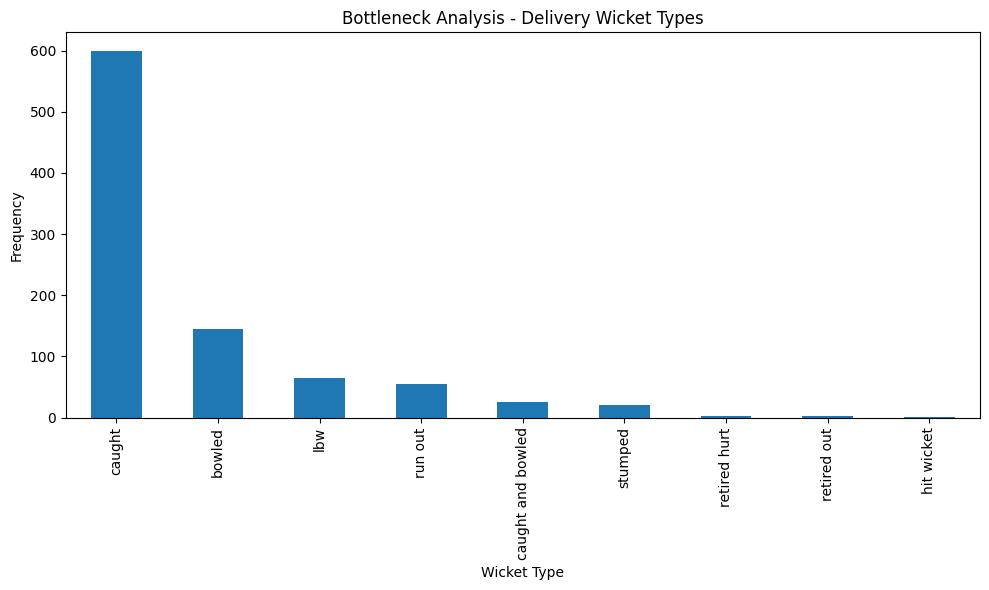

In [27]:
# Supply Chain Optimization Report

## 1. Inventory Management Optimization

### **Product Category Analysis**
# The analysis of **Sales and Profit** by product category reveals the most profitable categories, which can be used to optimize inventory. The following chart shows the distribution of **Sales and Profit** by **Product Category**:

# Visualizing Total Sales and Profit by Product Category
category_sales_profit = superstore_df.groupby('Product Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create bar plot for Sales and Profit by Product Category
category_sales_profit.plot(kind='bar', x='Product Category', y=['Sales', 'Profit'], stacked=True, figsize=(10, 6))
plt.title('Total Sales and Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Cost Reduction: Shipping Analysis

### **Shipping Cost vs Profit**
# The scatter plot below shows the relationship between **Shipping Cost** and **Profit**. A high shipping cost relative to profit is an area of concern for further cost reduction.

# Shipping Cost vs Profit Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore_df, x='Shipping Cost', y='Profit', hue='Ship Mode')
plt.title('Shipping Cost vs Profit by Ship Mode')
plt.xlabel('Shipping Cost')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


## 3. Delivery Time Improvement

### **Delivery Time Distribution**
# The distribution of delivery times indicates potential areas where delays might occur. By analyzing this data, we can identify slow delivery routes or inefficiencies in the shipping process.

# Delivery Time Distribution (using merged data)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Delivery Time'], kde=True)
plt.title('Delivery Time Distribution')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 4. Identifying Bottlenecks

### **Delivery Bottleneck Analysis**
# Bottleneck analysis reveals the common **wicket types** in the delivery process that might be causing delays. Understanding these can help pinpoint inefficiencies.

# Bottleneck Analysis (based on delivery wicket_type)
bottleneck_analysis = deliveries_df['wicket_type'].value_counts()

# Plotting Bottleneck types
bottleneck_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Bottleneck Analysis - Delivery Wicket Types')
plt.xlabel('Wicket Type')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Conclusion

# This report provides actionable insights to optimize **inventory management**, **reduce costs**, **improve delivery times**, and identify **bottlenecks** in the supply chain. Recommendations based on this analysis can lead to significant improvements in operational efficiency and profitability.
